In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hydramuscle.model.smc import SMC
from hydramuscle.model.layer import Layer
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Slow wave

In [62]:
T = 50
dt = 0.0002
save_interval = 5000
numx = 30
numy = 60

In [63]:
# Construct muscle sheet

smc = SMC(T=T, dt=dt, k_ipr=0.2, s0=100, k_deg=0.05)
layer = Layer(smc, 
              numx=numx, 
              numy=numy, 
              gip3x=0.1, 
              gip3y=2.0, 
              gcx=1000, 
              gcy=1000,
              save_interval=save_interval)

layer.set_stim_pattern(pathway='slow',
                       xmin=14, xmax=16, ymin=24, ymax=26,
                       stim_times=[0])
layer.set_stim_pattern(pathway='slow',
                       xmin=14, xmax=16, ymin=34, ymax=36,
                       stim_times=[0])

sol = layer.run(save_all=True)

100%|██████████| 250000/250000 [01:31<00:00, 2746.13it/s]


In [64]:
calcium = sol[:, 0 : numx*numy].reshape(-1, numx, numy)
ip = sol[:, 3*numx*numy : 4*numx*numy].reshape(-1, numx, numy)
calcium_lon = calcium[:, numx // 2, :]
ip_lon = ip[:, numx // 2, :]

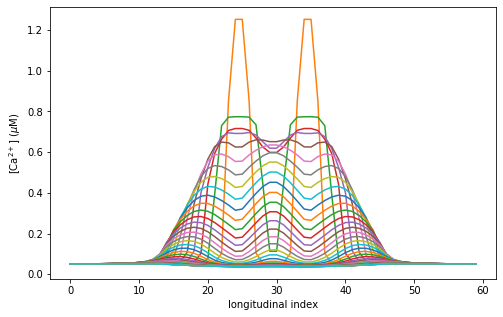

In [66]:
# Plot calcium

fig = plt.figure(figsize=(8,5))
# Calcium waves
# ax11 = fig.add_subplot(121)
# ax11.plot(calcium_lon[:, numy // 2:])
# ax11.set_xlabel('time(s)')
# ax11.set_ylabel(r'[Ca$^{2+}$] ($\mu$M)')
# Calcium wavefronts
ax12 = fig.add_subplot(111)
ax12.plot(calcium_lon.T)
ax12.set_xlabel('longitudinal index')
ax12.set_ylabel(r'[Ca$^{2+}$] ($\mu$M)')
plt.savefig('../../results/figures/pointwise_interaction/slow_curves_ca_2x2.pdf', bbox_inches='tight')
plt.show()

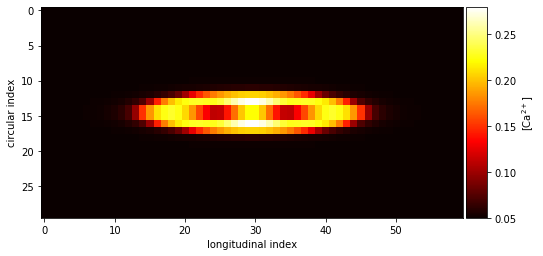

In [72]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()
im = ax.imshow(np.flip(calcium[15], 0), cmap='hot')
ax.set_xlabel('longitudinal index')
ax.set_ylabel('circular index')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('[Ca$^{2+}$]')
plt.savefig('../../results/figures/pointwise_interaction/wave_collision_slow_.pdf', bbox_inches='tight')
plt.show()

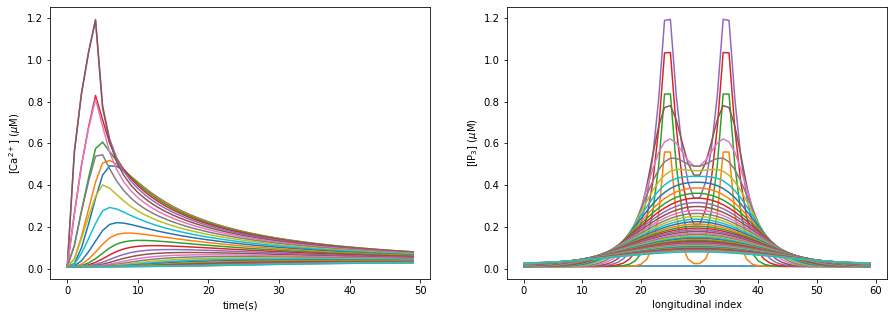

In [68]:
# Plot IP3

fig = plt.figure(figsize=(15,5))
# Calcium waves
ax11 = fig.add_subplot(121)
ax11.plot(ip_lon[:, numy // 2:])
ax11.set_xlabel('time(s)')
ax11.set_ylabel(r'[Ca$^{2+}$] ($\mu$M)')
# Calcium wavefronts
ax12 = fig.add_subplot(122)
ax12.plot(ip_lon.T)
ax12.set_xlabel('longitudinal index')
ax12.set_ylabel(r'[IP$_3$] ($\mu$M)')
plt.savefig('../results/figures/pointwise_interaction/slow_curves_ip_2x2.pdf', bbox_inches='tight')
plt.show()

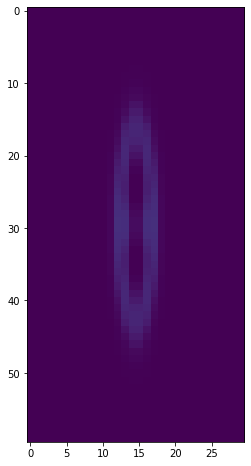

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(np.flip(calcium[20].T, 0), vmin=0.05, vmax=0.8)
plt.show()

## Fast wave

In [13]:
T = 0.2
dt = 0.0002
save_interval=5
numx = 30
numy = 60

In [14]:
# Construct muscle sheet

smc = SMC(T=T, dt=dt, k_ipr=0.2, s0=100, k_deg=0.05)
layer = Layer(smc, 
              numx=numx, 
              numy=numy, 
              gip3x=0.1, 
              gip3y=2.0, 
              gcx=1000, 
              gcy=1000,
              save_interval=save_interval)

layer.set_stim_pattern(pathway='fast',
                       xmin=14, xmax=16, ymin=24, ymax=26,
                       stim_times=[0])
layer.set_stim_pattern(pathway='fast',
                       xmin=14, xmax=16, ymin=34, ymax=36,
                       stim_times=[0])

sol = layer.run(save_all=True)

100%|██████████| 1000/1000 [00:00<00:00, 2614.21it/s]


In [15]:
calcium = sol[:, :numx * numy].reshape(-1, numx, numy)
v = sol[:, 4 * numx * numy : 5 * numx * numy].reshape(-1, numx, numy)
calcium_lon = calcium[:, numx // 2, :]
v_lon = v[:, numx // 2, :]

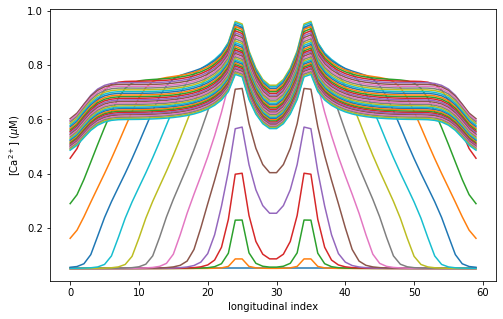

In [18]:
# Plot calcium

fig = plt.figure(figsize=(8,5))
# # Calcium waves
# ax11 = fig.add_subplot(121)
# ax11.plot(calcium_lon[:, numy // 2:])
# ax11.set_xlabel('time(s)')
# ax11.set_ylabel(r'[Ca$^{2+}$] ($\mu$M)')
# Calcium wavefronts
ax12 = fig.add_subplot(111)
ax12.plot(calcium_lon[::5].T)
ax12.set_xlabel('longitudinal index')
ax12.set_ylabel(r'[Ca$^{2+}$] ($\mu$M)')
plt.savefig('../../results/figures/pointwise_interaction/fast_curves_ca_2x2.pdf', bbox_inches='tight')
plt.show()

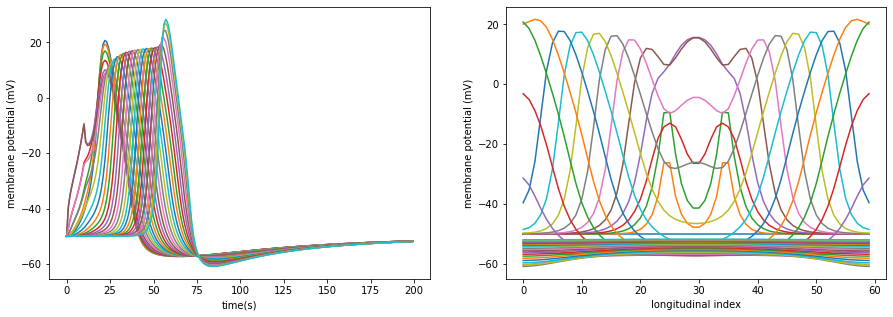

In [47]:
# Plot voltage

fig = plt.figure(figsize=(15,5))
# Calcium waves
ax11 = fig.add_subplot(121)
ax11.plot(v_lon[:, numy // 2:])
ax11.set_xlabel('time(s)')
ax11.set_ylabel('membrane potential (mV)')
# Calcium wavefronts
ax12 = fig.add_subplot(122)
ax12.plot(v_lon[::5].T)
ax12.set_xlabel('longitudinal index')
ax12.set_ylabel('membrane potential (mV)')
plt.savefig('../results/figures/pointwise_interaction/fast_curves_v_2x2.pdf', bbox_inches='tight')
plt.show()

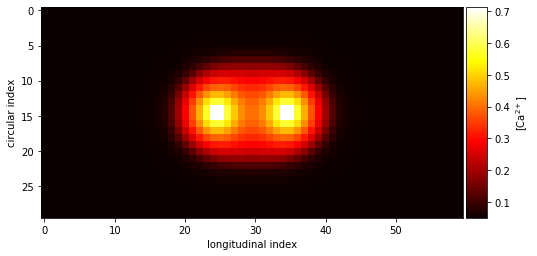

In [60]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()
im = ax.imshow(np.flip(calcium[25], 0), cmap='hot')
ax.set_xlabel('longitudinal index')
ax.set_ylabel('circular index')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('[Ca$^{2+}$]')
plt.savefig('../../results/figures/pointwise_interaction/wave_collision_fast_25ms.pdf', bbox_inches='tight')
plt.show()

In [37]:
0.2/len(calcium)*25*1000

25.0

## Linear superposition of slow waves

In [11]:
T = 50
dt = 0.01
save_interval = 100
numx = 30
numy = 60

smc = SMC(T=T, dt=dt, k_ipr=0.2, s0=100, k_deg=0.05)
layer1 = Layer(smc, 
              numx=numx, 
              numy=numy, 
              gip3x=0.1, 
              gip3y=2.0, 
              gcx=1000, 
              gcy=1000,
              save_interval=save_interval)

layer1.set_stim_pattern(pathway='slow',
                       xmin=14, xmax=16, ymin=24, ymax=26,
                       stim_times=[0])
sol1 = layer1.run(save_all=True)

layer2 = Layer(smc, 
              numx=numx, 
              numy=numy, 
              gip3x=0.1, 
              gip3y=2.0, 
              gcx=1000, 
              gcy=1000,
              save_interval=save_interval)

layer2.set_stim_pattern(pathway='slow',
                       xmin=14, xmax=16, ymin=34, ymax=36,
                       stim_times=[0])
sol2 = layer2.run(save_all=True)

100%|██████████| 5000/5000 [00:03<00:00, 1493.87it/s]


In [16]:
ca1 = sol1[:, 0 : numx*numy].reshape(-1, numx, numy)
ip1 = sol1[:, 3*numx*numy : 4*numx*numy].reshape(-1, numx, numy)
ca2 = sol2[:, 0 : numx*numy].reshape(-1, numx, numy)
ip2 = sol2[:, 3*numx*numy : 4*numx*numy].reshape(-1, numx, numy)

ca_cmb = ca1 + ca2
ip_cmb = ip1 + ip2

ca_cmb_lon = ca_cmb[:, numx // 2, :]
ip_cmb_lon = ip_cmb[:, numx // 2, :]

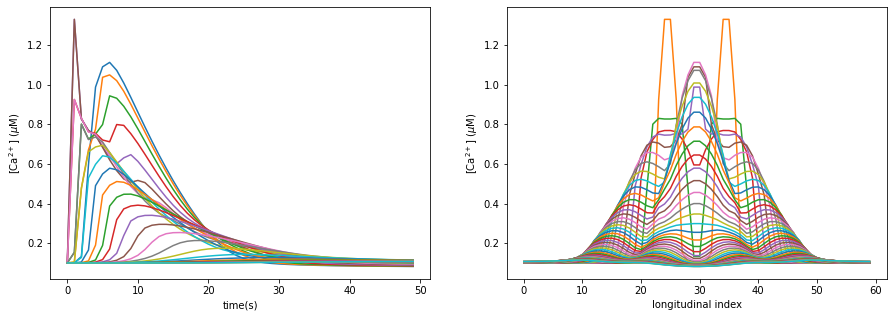

In [17]:
fig = plt.figure(figsize=(15,5))
# Calcium waves
ax11 = fig.add_subplot(121)
ax11.plot(ca_cmb_lon[:, numy // 2:])
ax11.set_xlabel('time(s)')
ax11.set_ylabel(r'[Ca$^{2+}$] ($\mu$M)')
# Calcium wavefronts
ax12 = fig.add_subplot(122)
ax12.plot(ca_cmb_lon.T)
ax12.set_xlabel('longitudinal index')
ax12.set_ylabel(r'[Ca$^{2+}$] ($\mu$M)')
# plt.savefig('../results/figures/pointwise_interaction/slow_curves_ca_2x2.pdf', bbox_inches='tight')
plt.show()

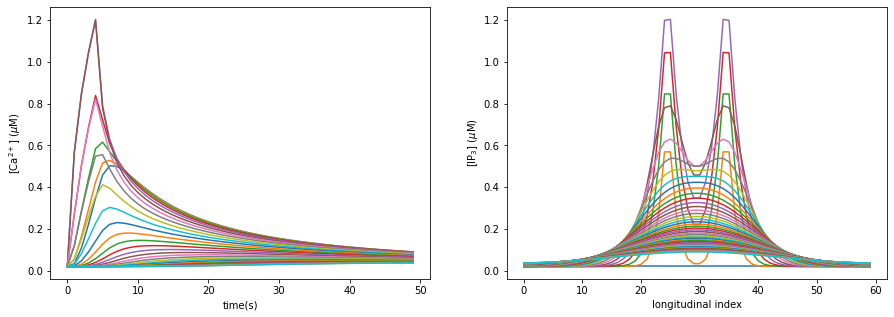

In [24]:
fig = plt.figure(figsize=(15,5))
# Calcium waves
ax11 = fig.add_subplot(121)
ax11.plot(ip_cmb_lon[:, numy // 2:])
ax11.set_xlabel('time(s)')
ax11.set_ylabel(r'[Ca$^{2+}$] ($\mu$M)')
# Calcium wavefronts
ax12 = fig.add_subplot(122)
ax12.plot(ip_cmb_lon.T)
ax12.set_xlabel('longitudinal index')
ax12.set_ylabel(r'[IP$_3$] ($\mu$M)')
# plt.savefig('../results/figures/pointwise_interaction/slow_curves_ip_2x2.pdf', bbox_inches='tight')
plt.show()